<a href="https://colab.research.google.com/github/coderoda/Awesome-pytorch-list/blob/master/ML_Project_Team_33.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [ ]:
# Need to have a Kaggle JSON file (ideally in /home/kaggle.json else change the directory in command)
# Download marketing_campaign.csv from https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis and mount it to /content/
!mkdir -p ~/.kaggle
!mv /home/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d imakash3011/customer-personality-analysis
!unzip customer-personality-analysis.zip
!mv marketing_campaign.csv /content/

mv: cannot stat '/home/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open customer-personality-analysis.zip, customer-personality-analysis.zip.zip or customer-personality-analysis.zip.ZIP.
mv: cannot stat 'marketing_campaign.csv': No such file or directory


In [4]:
data=pd.read_csv('/content/marketing_campaign.csv', delimiter='\t')

In [5]:
missing_values_count = data.isnull().sum()
print(missing_values_count)
data = data.dropna()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [7]:
print(data.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [9]:
print(data.describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2216.000000  2216.000000  2216.000000      2216.000000   
mean     49.012635   305.091606    26.356047       166.995939   
std      28.948352   337.327920    39.793917       224.283273   
min       0.000000     0.000000     0.000000  

# **Data Preproccessing**

In [11]:
# Handling categorical data
le1 = preprocessing.LabelEncoder()
le1.fit(data['Education'])
data['Education'] = le1.transform(data['Education'])


le2 = preprocessing.LabelEncoder()
le2.fit(data['Marital_Status'])
data['Marital_Status'] = le2.transform(data['Marital_Status'])



le3 = preprocessing.LabelEncoder()
le3.fit(data['Dt_Customer'])
data['Dt_Customer'] = le3.transform(data['Dt_Customer'])

# **Plotting Correlation**

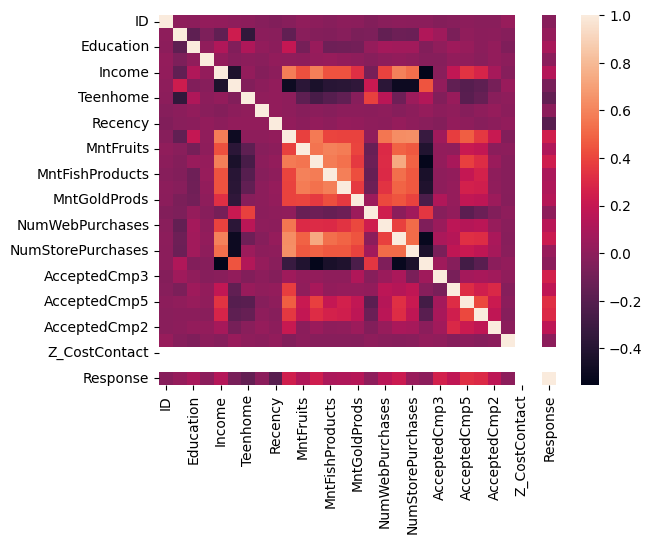

In [12]:
corrmat = data.corr()
sns.heatmap(corrmat)
plt.show()

<Axes: >

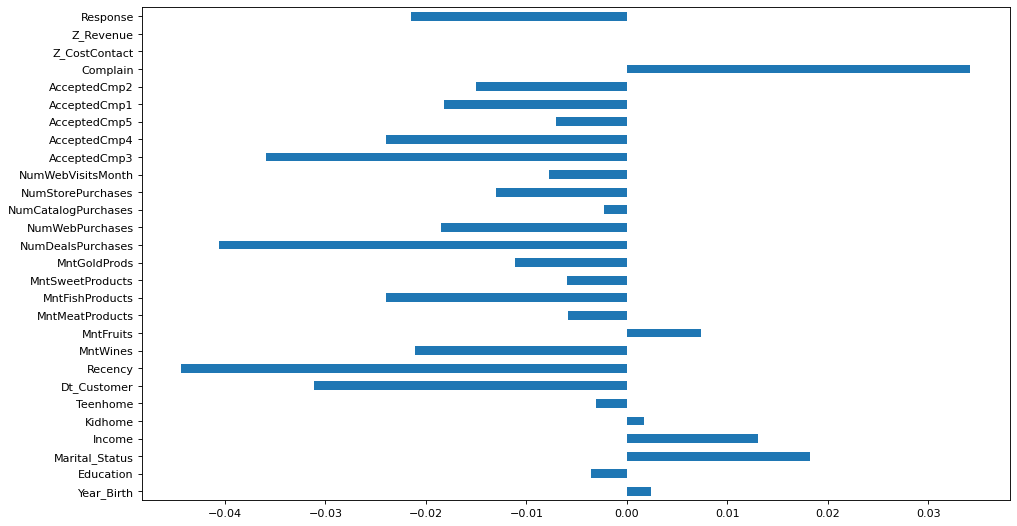

In [13]:
corrmat = data.corr()
plt.figure(figsize=(14,8),dpi=80)
corrmat.iloc[1:len(corrmat.iloc[:,0]),0].plot(kind='barh')

# **Checking for class imbalance**

In [14]:
label_counts = data['Response'].value_counts()
print(label_counts )

0    1883
1     333
Name: Response, dtype: int64


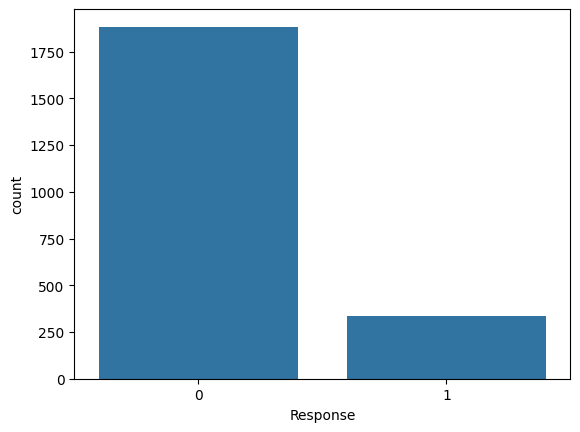

In [15]:
sns.countplot(x='Response',data=data)
plt.show()

# **Removing highly correlated features**
Among the X Variables we want to remove the highly correlated features(90% correlated with each other)

In [ ]:
def correlation(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j] > threshold):
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
features_highvar = correlation(data,0.9)
print(features_highvar)

set()


# **Removing low variance features**
• We need to drop constant features and low-variance features since they are not useful in our model \\
• Ideally constant features are those with variance = 0. However to remove both low variance and constant features let’s set our threshold to 0.01(1.00%)


**

In [ ]:
threshold = 0.01
varThreshold = VarianceThreshold(threshold = threshold)
varThreshold.fit(data)
lowVarsFeatures = []
lowVarsFeatures = [column for column in data.columns if column not in data.columns[varThreshold.get_support()]]
print(lowVarsFeatures)
X = data.drop(lowVarsFeatures,axis=1)
Y = data['Response']

['Complain', 'Z_CostContact', 'Z_Revenue']


In [ ]:
print(X.shape)
print(Y.shape)

(2216, 26)
(2216,)


# **Create Data split**

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state=123)

## **Supervised Learning**

## **Training RandomForest**

In [ ]:
pipeline = Pipeline([

                    ('Standardizer',StandardScaler())
                    ,('rf',RandomForestClassifier())
                    ])
parameters={

            'rf__max_depth': [80, 100,110],
            'rf__max_features': [2, 3],
            'rf__min_samples_leaf': [3, 5],
            'rf__min_samples_split': [8, 12],
            'rf__n_estimators': [100,300, 5]
            }

grid_pipeline = GridSearchCV(pipeline,parameters)
grid_pipeline.fit(X_train,y_train)
param_rf = grid_pipeline.best_params_

In [ ]:
print(param_rf)

{'rf__max_depth': 80, 'rf__max_features': 3, 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 8, 'rf__n_estimators': 100}


In [ ]:
best_model = grid_pipeline.best_estimator_
best_model_rf = best_model
y_pred = best_model.predict(X_test)

# **Analysing the model performance**

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, auc, classification_report

print("The classification report-")
print(classification_report(y_test, y_pred))
print(f"The accuracy score is  : {np.round(100*accuracy_score(y_test, y_pred),2)}%")


The classification report-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       567
           1       1.00      1.00      1.00        98

    accuracy                           1.00       665
   macro avg       1.00      1.00      1.00       665
weighted avg       1.00      1.00      1.00       665

The accuracy score is  : 100.0%


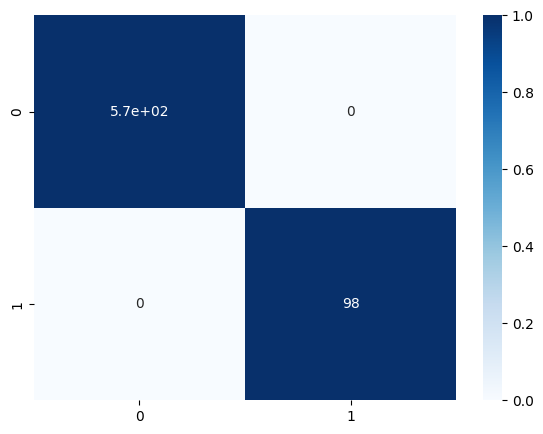

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,5))
plt.subplot(121)
g = sns.heatmap(cm,vmin=0,vmax=1,annot=True,cmap="Blues")

# **Learning**

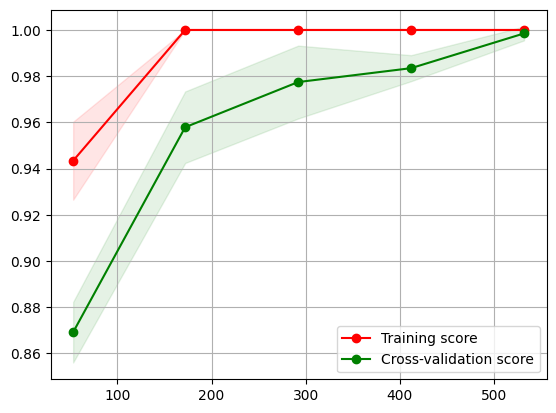

In [ ]:
from sklearn.model_selection import learning_curve
rf = RandomForestClassifier(max_depth=param_rf['rf__max_depth'],max_features=param_rf['rf__max_features'],min_samples_leaf=param_rf['rf__min_samples_leaf'],min_samples_split=param_rf['rf__min_samples_split'],n_estimators=param_rf['rf__n_estimators'])
train_sizes, train_scores, test_scores = learning_curve(rf, X_test, y_test)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

# **Training SVM**

In [ ]:
pipeline = Pipeline([
                    ('Standardizer',StandardScaler())
                    ,('svc',SVC())
                    ])

parameters = {'svc__C': [0.1, 1, 10, 100, 1000],
              'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'svc__kernel': ['linear']}

grid_pipeline = GridSearchCV(pipeline,parameters)
grid_pipeline.fit(X_train,y_train)
param_svc = grid_pipeline.best_params_

print(param_svc)

{'svc__C': 0.1, 'svc__gamma': 1, 'svc__kernel': 'linear'}


In [ ]:
best_model = grid_pipeline.best_estimator_
best_model_svc = best_model
y_pred = best_model_svc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, auc, classification_report

print("The classification report-")
print(classification_report(y_test, y_pred))
print(f"The accuracy score is  : {np.round(100*accuracy_score(y_test, y_pred),2)}%")

The classification report-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       567
           1       1.00      1.00      1.00        98

    accuracy                           1.00       665
   macro avg       1.00      1.00      1.00       665
weighted avg       1.00      1.00      1.00       665

The accuracy score is  : 100.0%


In [ ]:
from sklearn.model_selection import learning_curve
svc = SVC(C=param_svc['svc__C'], gamma=param_svc['svc__gamma'],kernel=param_svc['svc__kernel'])
train_sizes, train_scores, test_scores = learning_curve(svc, X_test, y_test)

In [ ]:

# svc = SVC(C=param_svc['svc__C'], gamma=param_svc['svc__gamma'],kernel=param_svc['svc__kernel'])
# train_sizes, train_scores, test_scores = learning_curve(
#     model, X, y,  n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))


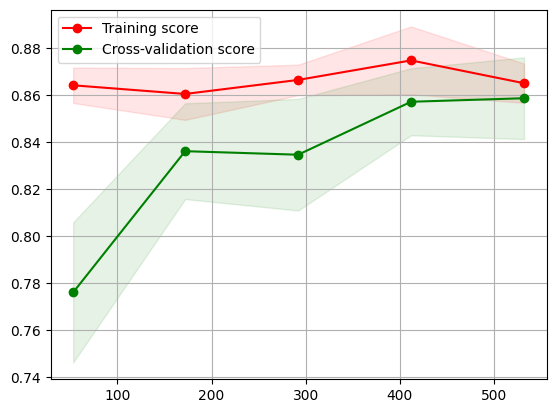

In [ ]:
from sklearn.model_selection import learning_curve

svc = SVC(C=param_svc['svc__C'], gamma=param_svc['svc__gamma'],kernel=param_svc['svc__kernel'])
train_sizes, train_scores, test_scores = learning_curve(svc, X_test, y_test)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()



In [ ]:
from sklearn.svm import SVC

svc = SVC(C= param_svc['svc__C'], gamma= param_svc['svc__gamma'], kernel=param_svc['svc__kernel'] )

# train_sizes, train_scores, test_scores = learning_curve(svc, X_test, y_test)

In [ ]:
print(svc)

SVC(C=0.1, gamma=1, kernel='linear')


In [ ]:
# from sklearn.model_selection import learning_curve

# train_sizes, train_scores, test_scores = learning_curve(svc, X_test, y_test)

In [ ]:

# train_sizes, train_scores, test_scores = learning_curve(svc, X_test, y_test)

# **Neural Network**

In [ ]:
pipeline = Pipeline([
                    ('Standardizer',StandardScaler())
                    ,('nn',MLPClassifier(max_iter=2000, random_state=0))
                    ])
parameters = {
    'nn__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'nn__activation': ['tanh', 'relu'],
    'nn__solver': ['sgd', 'adam'],
    'nn__alpha': [0.0001, 0.05],
    'nn__learning_rate': ['constant','adaptive'],
}

grid_pipeline = GridSearchCV(pipeline,parameters)
grid_pipeline.fit(X_train,y_train)
param_nn = grid_pipeline.best_params_

best_model = grid_pipeline.best_estimator_
best_model_nn = best_model
y_pred = best_model_nn.predict(X_test)

# **Analysing the model performance**

In [ ]:

from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, auc, classification_report

print("The classification report-")
print(classification_report(y_test, y_pred))
print(f"The accuracy score is  : {np.round(100*accuracy_score(y_test, y_pred),2)}%")


The classification report-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       567
           1       1.00      1.00      1.00        98

    accuracy                           1.00       665
   macro avg       1.00      1.00      1.00       665
weighted avg       1.00      1.00      1.00       665

The accuracy score is  : 100.0%


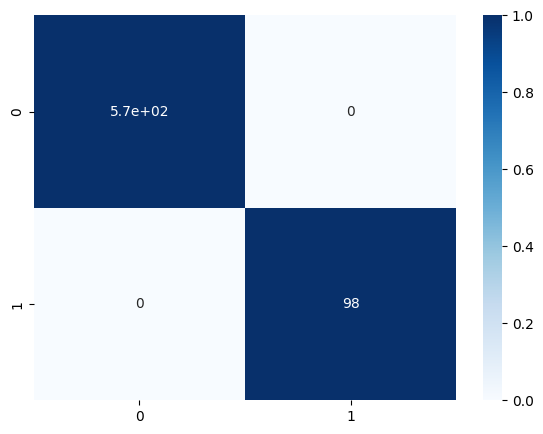

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,5))
plt.subplot(121)
g = sns.heatmap(cm,vmin=0,vmax=1,annot=True,cmap="Blues")

# **Learning curve**

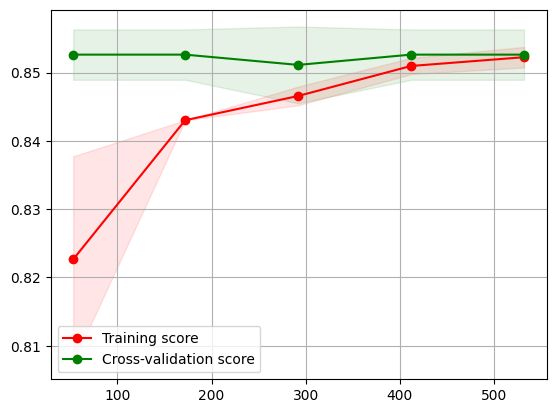

In [ ]:
from sklearn.model_selection import learning_curve
nn = MLPClassifier(activation=param_nn['nn__activation'],alpha=param_nn['nn__alpha'],hidden_layer_sizes=param_nn['nn__hidden_layer_sizes'],learning_rate= param_nn['nn__learning_rate'],solver= param_nn['nn__solver'])
train_sizes, train_scores, test_scores = learning_curve(nn, X_test, y_test)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

#  Unsupervised Clustering





###  Doing Clustering with all the features








/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1
1427461932255.6785


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2
698047000364.0657


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3
342822753544.5543


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4
206607256135.248


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5
145744568580.4705


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6
104460827537.20679


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7
76962154099.69579


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


8
63452163492.06427


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9
54449729838.87722


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10
47226190758.43466


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


11
42329377238.27957


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


12
38882125235.55815


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


13
36186158260.624435


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


14
33505812076.211697


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


15
30966685289.592896


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


16
28400597507.184486


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


17
26414048248.27621


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


18
24758158496.09426


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


19
22944041105.34613


ValueError: x and y must have same first dimension, but have shapes (20,) and (19,)

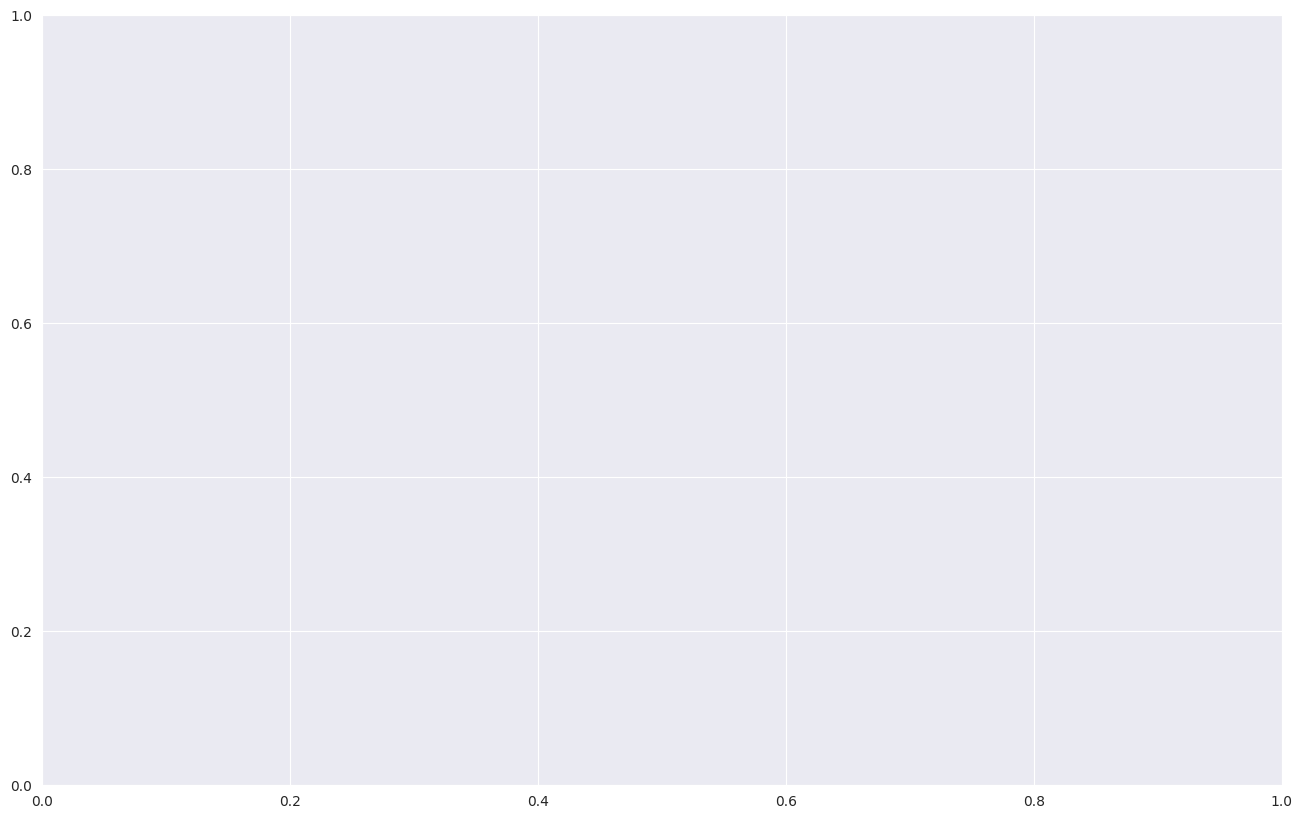

In [ ]:
from sklearn.cluster import KMeans
loss=list()
for i in range(1,20):
    kmeans=KMeans(n_clusters= i, init="k-means++")
    kmeans.fit(X)
    loss.append(kmeans.inertia_)
    print(i)
    print(loss[i-1])
sns.set_style("darkgrid")
plt.figure(figsize=(16,10))
plt.plot(range(1,21), loss)
plt.title("Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("loss")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs



param_grid = {
    'n_clusters': [2, 3, 4, 5, 6],
    'init': ['k-means++', 'random'],
    'max_iter': [100, 200, 300],
    'tol': [1e-4, 1e-5, 1e-6],
    'algorithm': ['lloyd', 'elkan'],
    'n_init': [5, 10, 20]  # Adjust as needed
}

# Define the clustering model
kmeans = KMeans()

# Define the silhouette scorer (or any other clustering metric)
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, scoring=silhouette_scorer)
grid_search.fit(X)
print("Best parameters found:", grid_search.best_params_)
print("Best silhouette score:", grid_search.best_score_)

# Plotting the loss curve
def plot_loss_curve(estimator, X):
    losses = []
    for n_clusters in range(2, 11):
        estimator.set_params(n_clusters=n_clusters)
        estimator.fit(X)
        losses.append(estimator.inertia_)
    plt.plot(range(2, 11), losses, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Loss Curve')
    plt.show()

# Plotting the elbow method
def plot_elbow_method(estimator, X):
    distortions = []
    for n_clusters in range(2, 11):
        estimator.set_params(n_clusters=n_clusters)
        estimator.fit(X)
        distortions.append(sum(np.min(np.square(estimator.transform(X)), axis=1)) / X.shape[0])
    plt.plot(range(2, 11), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.show()

# Plotting the loss curve and elbow method
plot_loss_curve(KMeans(**grid_search.best_params_), X)
plot_elbow_method(KMeans(**grid_search.best_params_), X)